# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | sambava
Processing Record 7 of Set 1 | byford
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | maues
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | labytnangi
Processing Record 22 of Set 1 | taiohae
City

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.67,70,0,5.85,PN,1741051749
1,puerto ayora,-0.7393,-90.3518,25.86,94,100,2.58,EC,1741051750
2,puerto natales,-51.7236,-72.4875,4.66,95,89,1.74,CL,1741051751
3,waitangi,-43.9535,-176.5597,18.23,93,100,2.24,NZ,1741051752
4,yellowknife,62.4560,-114.3525,-7.71,79,75,3.09,CA,1741051638


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.67,70,0,5.85,PN,1741051749
1,puerto ayora,-0.7393,-90.3518,25.86,94,100,2.58,EC,1741051750
2,puerto natales,-51.7236,-72.4875,4.66,95,89,1.74,CL,1741051751
3,waitangi,-43.9535,-176.5597,18.23,93,100,2.24,NZ,1741051752
4,yellowknife,62.4560,-114.3525,-7.71,79,75,3.09,CA,1741051638
...,...,...,...,...,...,...,...,...,...
571,queenstown,-31.8976,26.8753,18.42,69,13,2.05,ZA,1741052393
572,orsa,54.5153,30.4053,1.44,90,100,7.23,BY,1741052394
573,mtwango,-9.0167,34.8000,13.72,95,100,2.68,TZ,1741052395


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

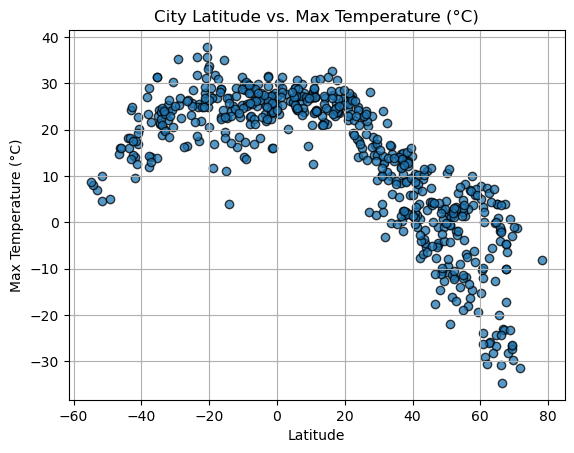

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

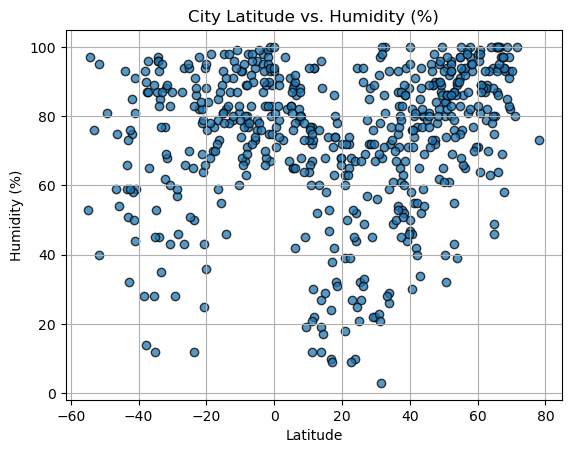

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

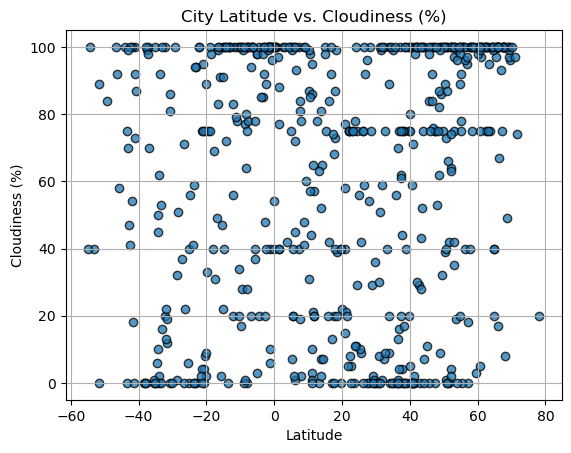

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

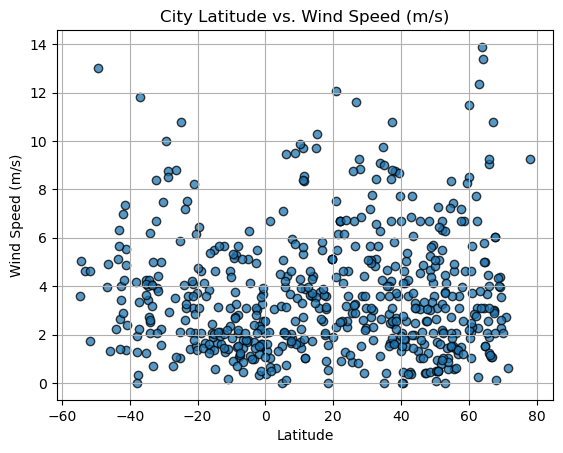

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, xlabel, ylabel, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regression_values, "r-")
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(filename)
    plt.show()
    print(f"The r^2-value is: {rvalue**2}")

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,yellowknife,62.4560,-114.3525,-7.71,79,75,3.09,CA,1741051638
8,dudinka,69.4058,86.1778,-26.69,93,100,2.29,RU,1741051757
11,talnakh,69.4865,88.3972,-29.65,82,96,3.55,RU,1741051761
13,klyuchi,52.2667,79.1667,-11.70,96,100,2.10,RU,1741051763
16,kodiak,57.7900,-152.4072,3.73,100,100,7.20,US,1741051766


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.67,70,0,5.85,PN,1741051749
1,puerto ayora,-0.7393,-90.3518,25.86,94,100,2.58,EC,1741051750
2,puerto natales,-51.7236,-72.4875,4.66,95,89,1.74,CL,1741051751
3,waitangi,-43.9535,-176.5597,18.23,93,100,2.24,NZ,1741051752
5,sambava,-14.2667,50.1667,26.89,82,100,1.66,MG,1741051754


###  Temperature vs. Latitude Linear Regression Plot

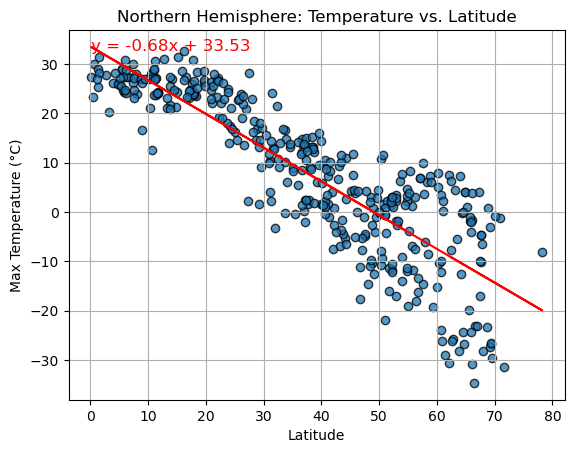

The r^2-value is: 0.7444628365625098


In [37]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                  "Northern Hemisphere: Temperature vs. Latitude",
                  "Latitude", "Max Temperature (°C)", "output_data/Northern_Temp_vs_Lat.png")

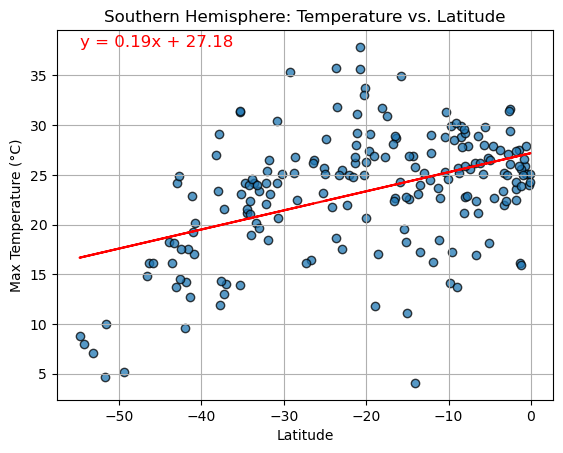

The r^2-value is: 0.20341085230468994


In [38]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                  "Southern Hemisphere: Temperature vs. Latitude",
                  "Latitude", "Max Temperature (°C)", "output_data/Southern_Temp_vs_Lat.png")

### Humidity vs. Latitude Linear Regression Plot

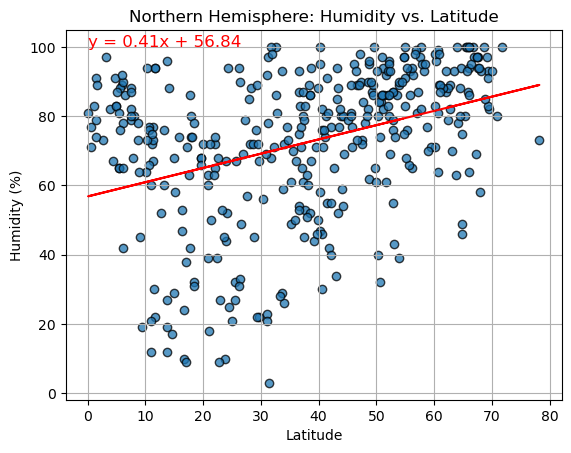

The r^2-value is: 0.1356803942645006


In [39]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                  "Northern Hemisphere: Humidity vs. Latitude",
                  "Latitude", "Humidity (%)", "output_data/Northern_Humidity_vs_Lat.png")

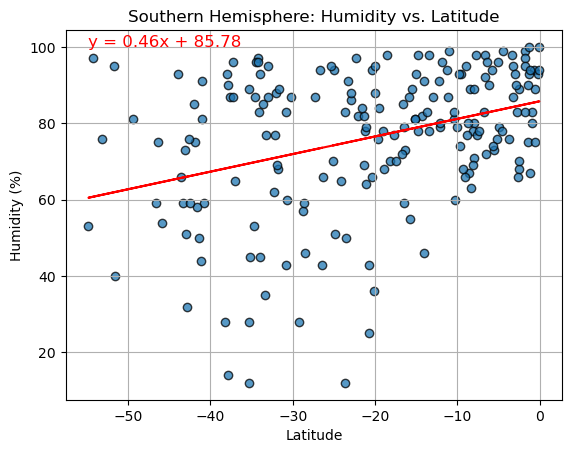

The r^2-value is: 0.12485311318551418


In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                  "Southern Hemisphere: Humidity vs. Latitude",
                  "Latitude", "Humidity (%)", "output_data/Southern_Humidity_vs_Lat.png")

### Cloudiness vs. Latitude Linear Regression Plot

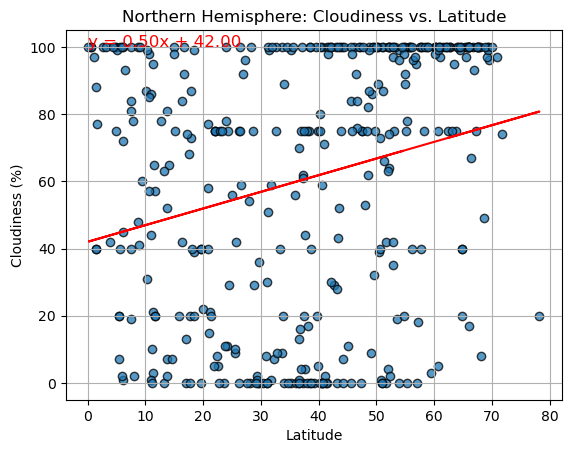

The r^2-value is: 0.0626424800890113


In [41]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                  "Northern Hemisphere: Cloudiness vs. Latitude",
                  "Latitude", "Cloudiness (%)", "output_data/Northern_Cloudiness_vs_Lat.png")

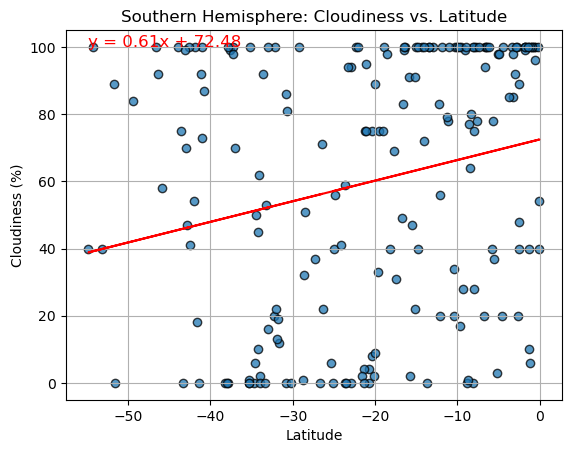

The r^2-value is: 0.05145378360934082


In [42]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                  "Southern Hemisphere: Cloudiness vs. Latitude",
                  "Latitude", "Cloudiness (%)", "output_data/Southern_Cloudiness_vs_Lat.png")

### Wind Speed vs. Latitude Linear Regression Plot

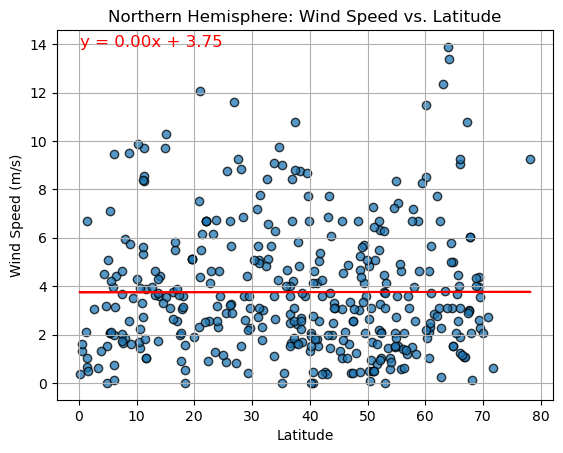

The r^2-value is: 1.763376543349681e-06


In [43]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                  "Northern Hemisphere: Wind Speed vs. Latitude",
                  "Latitude", "Wind Speed (m/s)", "output_data/Northern_Wind_vs_Lat.png")

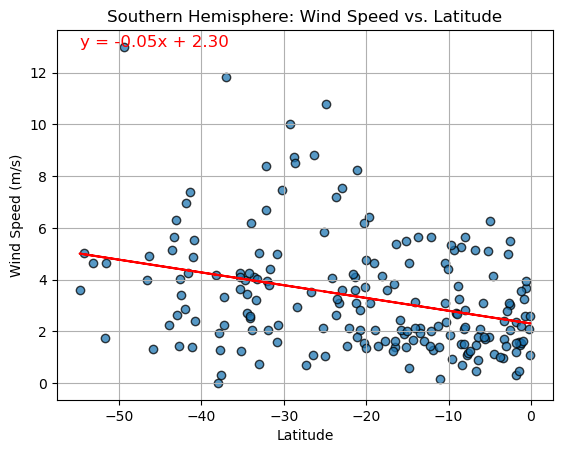

The r^2-value is: 0.10337507362610474


In [44]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                  "Southern Hemisphere: Wind Speed vs. Latitude",
                  "Latitude", "Wind Speed (m/s)", "output_data/Southern_Wind_vs_Lat.png")

**Discussion about the linear relationship:** The linear regression analysis examines the relationship between latitude and various weather variables by fitting a line separately for cities in the Northern and Southern Hemispheres. It reveals trends such as the decrease in maximum temperatures with increasing distance from the equator. By comparing slopes, correlation coefficients, and p-values, this approach quantifies these trends' strength and statistical significance while acknowledging that a linear model may not capture the full complexity of weather patterns.